In [1]:
import os
from glob import glob

# Define your paths
label_path = "/home/holidayj/Desktop/yolov7_udp/data/train"
image_path = "/home/holidayj/Desktop/yolov7_udp/data/train"

# Get all label files
label_files = glob(os.path.join(label_path, "*.txt"))

# Initialize lists to collect width and height
widths = []
heights = []

# Iterate through each label file
for label_file in label_files:
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue  # skip malformed lines

            _, _, _, w, h = map(float, parts)
            widths.append(w)
            heights.append(h)

# Ensure there is data
if not widths or not heights:
    print("No annotation data found.")
    exit()

# Step 1: Calculate min and max
max_width = max(widths)
min_width = min(widths)
max_height = max(heights)
min_height = min(heights)

print(f"Max Width: {max_width:.6f}")
print(f"Min Width: {min_width:.6f}")
print(f"Max Height: {max_height:.6f}")
print(f"Min Height: {min_height:.6f}")

# Step 2: Divide the range into 3 parts
width_interval = (max_width - min_width) / 3
height_interval = (max_height - min_height) / 3

# Step 3: Calculate the center of each grid cell
anchor_points = []

for i in range(3):
    for j in range(3):
        center_width = min_width + (i + 0.5) * width_interval
        center_height = min_height + (j + 0.5) * height_interval
        anchor_points.append((center_width, center_height))

# Step 4: Print anchor points
print("\nAnchor Points (width, height):")
for idx, (w, h) in enumerate(anchor_points, 1):
    w_320 = int(w * 320)
    h_320 = int(h * 320)
    
    print(f"{idx}: ({w_320}, {h_320})")
    print(f"{idx}: ({w:.6f}, {h:.6f})")
    


Max Width: 0.584375
Min Width: 0.024845
Max Height: 0.709375
Min Height: 0.021875

Anchor Points (width, height):
1: (37, 43)
1: (0.118100, 0.136458)
2: (37, 117)
2: (0.118100, 0.365625)
3: (37, 190)
3: (0.118100, 0.594792)
4: (97, 43)
4: (0.304610, 0.136458)
5: (97, 117)
5: (0.304610, 0.365625)
6: (97, 190)
6: (0.304610, 0.594792)
7: (157, 43)
7: (0.491120, 0.136458)
8: (157, 117)
8: (0.491120, 0.365625)
9: (157, 190)
9: (0.491120, 0.594792)


Max Width: 0.584375
Min Width: 0.024845
Max Height: 0.709375
Min Height: 0.021875


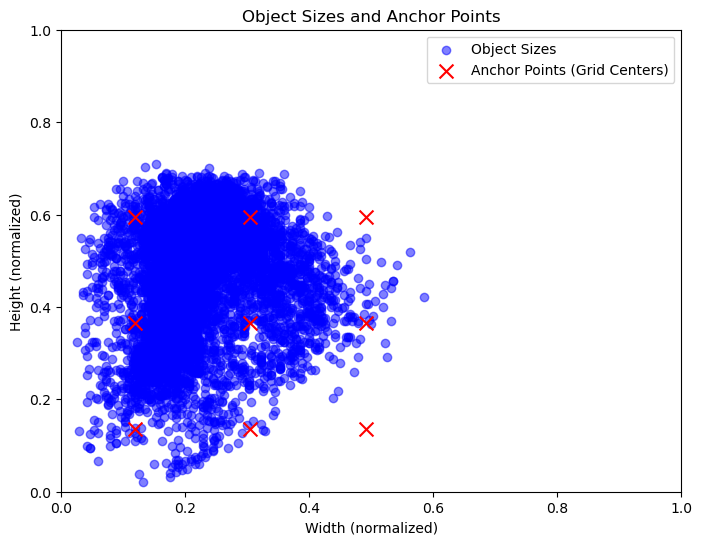

In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt

# Define your paths
label_path = "/home/holidayj/Desktop/yolov7_udp/data/train"

# Get all label files
label_files = glob(os.path.join(label_path, "*.txt"))

# Initialize lists to collect width and height
widths = []
heights = []

# Iterate through each label file
for label_file in label_files:
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue  # skip malformed lines

            _, _, _, w, h = map(float, parts)
            widths.append(w)
            heights.append(h)

# Ensure there is data
if not widths or not heights:
    print("No annotation data found.")
    exit()

# Step 1: Calculate min and max
max_width = max(widths)
min_width = min(widths)
max_height = max(heights)
min_height = min(heights)

print(f"Max Width: {max_width:.6f}")
print(f"Min Width: {min_width:.6f}")
print(f"Max Height: {max_height:.6f}")
print(f"Min Height: {min_height:.6f}")

# Step 2: Divide the range into 3 parts
width_interval = (max_width - min_width) / 3
height_interval = (max_height - min_height) / 3

# Step 3: Calculate the center of each grid cell
anchor_points = []

for i in range(3):
    for j in range(3):
        center_width = min_width + (i + 0.5) * width_interval
        center_height = min_height + (j + 0.5) * height_interval
        anchor_points.append((center_width, center_height))

# Step 4: Plotting
plt.figure(figsize=(8, 6))

# Plot original object points
plt.scatter(widths, heights, c='blue', alpha=0.5, label='Object Sizes')

# Plot anchor points as 'X' marks
anchor_widths, anchor_heights = zip(*anchor_points)
plt.scatter(anchor_widths, anchor_heights, c='red', marker='x', s=100, label='Anchor Points (Grid Centers)')

# Labels and legend
plt.title('Object Sizes and Anchor Points')
plt.xlabel('Width (normalized)')
plt.ylabel('Height (normalized)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
# plt.grid(True)

# Show the plot
plt.show()


Max Width: 0.584375
Min Width: 0.024845
Max Height: 0.709375
Min Height: 0.021875


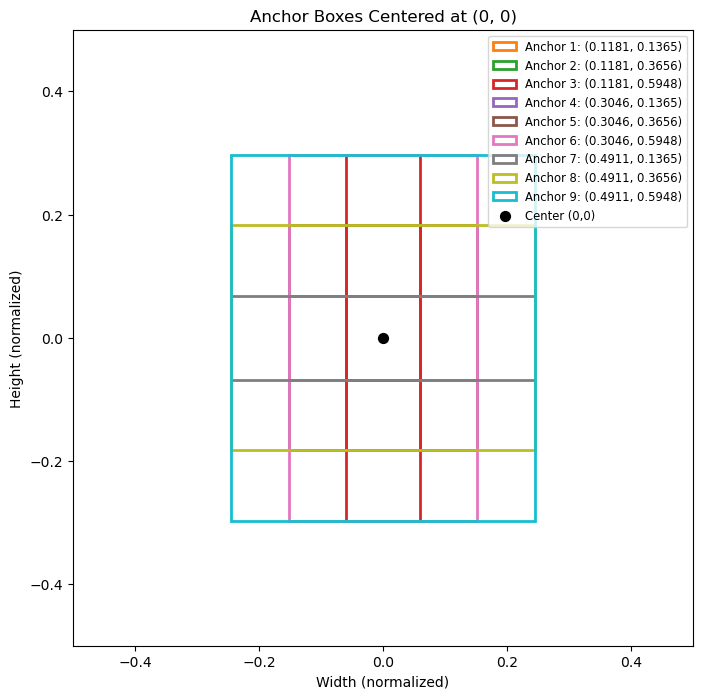

In [3]:


#%% Draw the object plot and anchor boxes



#%%

import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define your paths
label_path = "/home/holidayj/Desktop/yolov7_udp/data/train"

# Get all label files
label_files = glob(os.path.join(label_path, "*.txt"))

# Initialize lists to collect width and height
widths = []
heights = []

# Iterate through each label file
for label_file in label_files:
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue  # skip malformed lines

            _, _, _, w, h = map(float, parts)
            widths.append(w)
            heights.append(h)

# Ensure there is data
if not widths or not heights:
    print("No annotation data found.")
    exit()

# Step 1: Calculate min and max
max_width = max(widths)
min_width = min(widths)
max_height = max(heights)
min_height = min(heights)

print(f"Max Width: {max_width:.6f}")
print(f"Min Width: {min_width:.6f}")
print(f"Max Height: {max_height:.6f}")
print(f"Min Height: {min_height:.6f}")

# Step 2: Divide the range into 3 parts
width_interval = (max_width - min_width) / 3
height_interval = (max_height - min_height) / 3

# Step 3: Calculate the center of each grid cell (width, height)
anchor_points = []

for i in range(3):
    for j in range(3):
        center_width = min_width + (i + 0.5) * width_interval
        center_height = min_height + (j + 0.5) * height_interval
        anchor_points.append((center_width, center_height))

# Step 4: Plot rectangles centered at (0, 0)
fig, ax = plt.subplots(figsize=(8, 8))

# Draw each rectangle
for idx, (w, h) in enumerate(anchor_points, 1):
    # Rectangle parameters: lower-left corner (x, y), width, height
    rect = patches.Rectangle(
        (-w / 2, -h / 2),  # lower-left corner
        w,
        h,
        linewidth=2,
        edgecolor='C{}'.format(idx),  # cycle through colors
        facecolor='none',
        label=f'Anchor {idx}: ({w:.4f}, {h:.4f})'
    )
    ax.add_patch(rect)

# Draw the origin point for reference
ax.scatter(0, 0, color='black', s=50, zorder=5, label='Center (0,0)')

# Set plot limits for better visibility
max_anchor_w = max([w for w, _ in anchor_points])
max_anchor_h = max([h for _, h in anchor_points])
margin = 0.5 #max(max_anchor_w, max_anchor_h) * 1.5
ax.set_xlim(-margin, margin)
ax.set_ylim(-margin, margin)

# Add grid, labels, title
ax.set_xlabel('Width (normalized)')
ax.set_ylabel('Height (normalized)')
ax.set_title('Anchor Boxes Centered at (0, 0)')
ax.legend(loc='upper right', fontsize='small')
# ax.grid(True)

plt.show()
